## Predicting the Sales Price of Bulldozers using Machine Learning..

## 1. Problem Definition:- 
> Predict the sale price of a particular piece of heavy equiment at auction based on it's usage, equipment type, and configuaration.  The data is sourced from auction result postings and includes information on usage and equipment configurations.

## 2. Data
The data for this competition is split into three parts:

* **Train.csv** is the training set, which contains data through the end of 2011.
* **Valid.csv** is the validation set, which contains data from January 1, 2012 - April 30, 2012 You make predictions on this set throughout the majority of the competition. Your score on this set is used to create the public leaderboard.
* **Test.csv** is the test set, which won't be released until the last week of the competition. It contains data from May 1, 2012 - November 2012. Your score on the test set determines your final rank for the competition.

## 3. Evaluation
*The evaluation metric for this competition is the RMSLE (root mean squared log error) between the actual and predicted auction prices.

## 4 Features.

In [1]:
#Modules for EDA(Exploratory Data Analysis)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import sklearn

In [2]:
df = pd.read_csv("./data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory =False)

In [3]:
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
0,1139246,66000.0,999089,3157,121,3.0,2004,68.0,Low,11/16/2006 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
1,1139248,57000.0,117657,77,121,3.0,1996,4640.0,Low,3/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
2,1139249,10000.0,434808,7009,121,3.0,2001,2838.0,High,2/26/2004 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1139251,38500.0,1026470,332,121,3.0,2001,3486.0,High,5/19/2011 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1139253,11000.0,1057373,17311,121,3.0,2007,722.0,Medium,7/23/2009 0:00,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 412698 entries, 0 to 412697
Data columns (total 53 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   SalesID                   412698 non-null  int64  
 1   SalePrice                 412698 non-null  float64
 2   MachineID                 412698 non-null  int64  
 3   ModelID                   412698 non-null  int64  
 4   datasource                412698 non-null  int64  
 5   auctioneerID              392562 non-null  float64
 6   YearMade                  412698 non-null  int64  
 7   MachineHoursCurrentMeter  147504 non-null  float64
 8   UsageBand                 73670 non-null   object 
 9   saledate                  412698 non-null  object 
 10  fiModelDesc               412698 non-null  object 
 11  fiBaseModel               412698 non-null  object 
 12  fiSecondaryDesc           271971 non-null  object 
 13  fiModelSeries             58667 non-null   o

In [5]:
df.describe

<bound method NDFrame.describe of         SalesID  SalePrice  MachineID  ModelID  datasource  auctioneerID  \
0       1139246    66000.0     999089     3157         121           3.0   
1       1139248    57000.0     117657       77         121           3.0   
2       1139249    10000.0     434808     7009         121           3.0   
3       1139251    38500.0    1026470      332         121           3.0   
4       1139253    11000.0    1057373    17311         121           3.0   
...         ...        ...        ...      ...         ...           ...   
412693  6333344    10000.0    1919201    21435         149           2.0   
412694  6333345    10500.0    1882122    21436         149           2.0   
412695  6333347    12500.0    1944213    21435         149           2.0   
412696  6333348    10000.0    1794518    21435         149           2.0   
412697  6333349    13000.0    1944743    21436         149           2.0   

        YearMade  MachineHoursCurrentMeter UsageBand 

In [6]:
df.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
saledate                         0
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension     

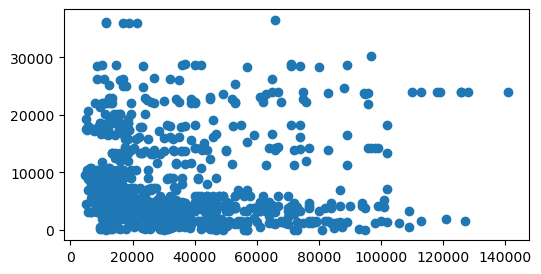

In [7]:
fig, ax = plt.subplots(figsize=(6,3))
ax.scatter(df['SalePrice'][:1000], df['ModelID'][:1000]);


<Axes: ylabel='Frequency'>

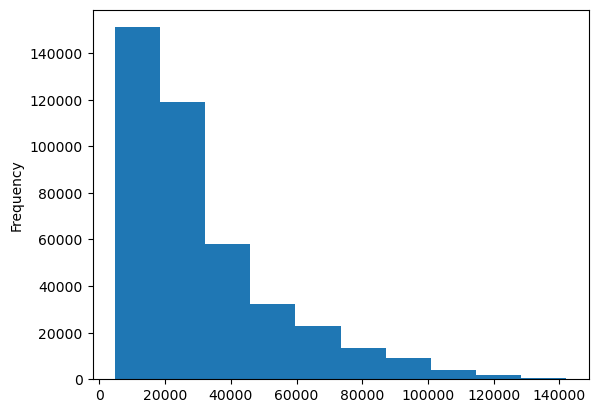

In [8]:
df.SalePrice.plot.hist()

In [9]:
df['saledate'].dtype

dtype('O')

In [10]:
df.saledate[:10]

0    11/16/2006 0:00
1     3/26/2004 0:00
2     2/26/2004 0:00
3     5/19/2011 0:00
4     7/23/2009 0:00
5    12/18/2008 0:00
6     8/26/2004 0:00
7    11/17/2005 0:00
8     8/27/2009 0:00
9      8/9/2007 0:00
Name: saledate, dtype: object

## Parsing dates

When we work with time series data, we want to enrich the time and date component as much as possible.

We can do that by telling pandas which of our columns has dates in it using the `parse_dates` parameter.

In [11]:
#Importing Data Again But this time parsing the dates
df = pd.read_csv("./data/bluebook-for-bulldozers/TrainAndValid.csv", low_memory=False,
                 parse_dates = ['saledate'])

In [12]:
df['saledate'].dtype

dtype('<M8[ns]')

In [13]:
df.saledate[:10]

0   2006-11-16
1   2004-03-26
2   2004-02-26
3   2011-05-19
4   2009-07-23
5   2008-12-18
6   2004-08-26
7   2005-11-17
8   2009-08-27
9   2007-08-09
Name: saledate, dtype: datetime64[ns]

## Sort DataFrame by `saledate`

In [14]:
df.sort_values(by=['saledate'], inplace=True)
df.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls
205615,1646770,9500.0,1126363,8434,132,18.0,1974,NaN,NaN,1989-01-17,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
274835,1821514,14000.0,1194089,10150,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
141296,1505138,50000.0,1473654,4139,132,99.0,1978,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,Straight,None or Unspecified,NaN,NaN
212552,1671174,16000.0,1327630,8591,132,99.0,1980,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Standard,Conventional
62755,1329056,22000.0,1336053,4089,132,99.0,1984,NaN,NaN,1989-01-31,...,NaN,NaN,NaN,NaN,NaN,None or Unspecified,PAT,Lever,NaN,NaN


In [15]:
df.saledate

205615   1989-01-17
274835   1989-01-31
141296   1989-01-31
212552   1989-01-31
62755    1989-01-31
            ...    
410879   2012-04-28
412476   2012-04-28
411927   2012-04-28
407124   2012-04-28
409203   2012-04-28
Name: saledate, Length: 412698, dtype: datetime64[ns]

In [16]:
#Make a copy of our DataFrame
df_tmp = df.copy()

In [17]:
df_tmp is df

False

## Add Datetime Parameters for `saledate` column

In [18]:
df_tmp["saleYear"] = df_tmp.saledate.dt.year
df_tmp['saleMonth'] = df_tmp.saledate.dt.month
df_tmp['saleDay'] = df_tmp.saledate.dt.day
df_tmp['saleDayofWeek'] = df_tmp.saledate.dt.dayofweek
df_tmp['saleDayofYear'] = df_tmp.saledate.dt.dayofyear

In [19]:
df_tmp.saleYear[:10]

205615    1989
274835    1989
141296    1989
212552    1989
62755     1989
54653     1989
81383     1989
204924    1989
135376    1989
113390    1989
Name: saleYear, dtype: int32

In [20]:
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
saledate,1989-01-17 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00,1989-01-31 00:00:00


In [21]:
#Date time features are added, now we can remove saledate
df_tmp.drop("saledate", axis=1, inplace=True)
df_tmp.head().T

,205615,274835,141296,212552,62755
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


In [22]:
# Check the Values of Different Columns

df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

## 5. Modelling

In [23]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_jobs= -1,
                              random_state = 9)
model.fit(df_tmp.drop('SalePrice', axis=1), df_tmp.SalePrice) #Not working because we have Categorical values in the rows

ValueError: could not convert string to float: 'Low'

In [24]:
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

In [25]:
df_tmp.dtypes

SalesID                       int64
SalePrice                   float64
MachineID                     int64
ModelID                       int64
datasource                    int64
auctioneerID                float64
YearMade                      int64
MachineHoursCurrentMeter    float64
UsageBand                    object
fiModelDesc                  object
fiBaseModel                  object
fiSecondaryDesc              object
fiModelSeries                object
fiModelDescriptor            object
ProductSize                  object
fiProductClassDesc           object
state                        object
ProductGroup                 object
ProductGroupDesc             object
Drive_System                 object
Enclosure                    object
Forks                        object
Pad_Type                     object
Ride_Control                 object
Stick                        object
Transmission                 object
Turbocharged                 object
Blade_Extension             

## Convert String into Categories
String can be converted into Panda's Categories.

In [26]:
pd.api.types.is_string_dtype(df_tmp['UsageBand'])

False

In [27]:
#Finding which columns contains `string`
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        print(label)

fiModelDesc
fiBaseModel
fiProductClassDesc
state
ProductGroup
ProductGroupDesc


In [33]:
# This will convert all the String values into category values
for label, content in df_tmp.items():
    if pd.api.types.is_string_dtype(content):
        df_tmp[label] = content.astype("category").cat.as_ordered() 
#as_ordered() method helps on prviding the logical prefernece to a specific value over other dying operatins like sorting

In [34]:
df_tmp.state.cat.categories

Index(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 'Colorado',
       'Connecticut', 'Delaware', 'Florida', 'Georgia', 'Hawaii', 'Idaho',
       'Illinois', 'Indiana', 'Iowa', 'Kansas', 'Kentucky', 'Louisiana',
       'Maine', 'Maryland', 'Massachusetts', 'Michigan', 'Minnesota',
       'Mississippi', 'Missouri', 'Montana', 'Nebraska', 'Nevada',
       'New Hampshire', 'New Jersey', 'New Mexico', 'New York',
       'North Carolina', 'North Dakota', 'Ohio', 'Oklahoma', 'Oregon',
       'Pennsylvania', 'Puerto Rico', 'Rhode Island', 'South Carolina',
       'South Dakota', 'Tennessee', 'Texas', 'Unspecified', 'Utah', 'Vermont',
       'Virginia', 'Washington', 'Washington DC', 'West Virginia', 'Wisconsin',
       'Wyoming'],
      dtype='object')

In [36]:
df_tmp.state.value_counts()

state
Florida           67320
Texas             53110
California        29761
Washington        16222
Georgia           14633
Maryland          13322
Mississippi       13240
Ohio              12369
Illinois          11540
Colorado          11529
New Jersey        11156
North Carolina    10636
Tennessee         10298
Alabama           10292
Pennsylvania      10234
South Carolina     9951
Arizona            9364
New York           8639
Connecticut        8276
Minnesota          7885
Missouri           7178
Nevada             6932
Louisiana          6627
Kentucky           5351
Maine              5096
Indiana            4124
Arkansas           3933
New Mexico         3631
Utah               3046
Unspecified        2801
Wisconsin          2745
New Hampshire      2738
Virginia           2353
Idaho              2025
Oregon             1911
Michigan           1831
Wyoming            1672
Montana            1336
Iowa               1336
Oklahoma           1326
Nebraska            866
West Virgi

In [37]:
df_tmp.state.cat.codes.value_counts()

8     67320
43    53110
4     29761
48    16222
9     14633
19    13322
23    13240
34    12369
12    11540
5     11529
29    11156
32    10636
42    10298
0     10292
37    10234
40     9951
2      9364
31     8639
6      8276
22     7885
24     7178
27     6932
17     6627
16     5351
18     5096
13     4124
3      3933
30     3631
45     3046
44     2801
51     2745
28     2738
47     2353
11     2025
36     1911
21     1831
52     1672
25     1336
14     1336
35     1326
26      866
50      840
15      667
7       510
33      480
1       430
20      347
46      300
41      244
10      118
39       83
38       42
49        2
Name: count, dtype: int64

In [39]:
# Checking how many values are Missing in each column
df_tmp.isna().sum()

SalesID                          0
SalePrice                        0
MachineID                        0
ModelID                          0
datasource                       0
auctioneerID                 20136
YearMade                         0
MachineHoursCurrentMeter    265194
UsageBand                   339028
fiModelDesc                      0
fiBaseModel                      0
fiSecondaryDesc             140727
fiModelSeries               354031
fiModelDescriptor           337882
ProductSize                 216605
fiProductClassDesc               0
state                            0
ProductGroup                     0
ProductGroupDesc                 0
Drive_System                305611
Enclosure                      334
Forks                       214983
Pad_Type                    331602
Ride_Control                259970
Stick                       331602
Transmission                224691
Turbocharged                331602
Blade_Extension             386715
Blade_Width         

## Save Preprocessed Data

In [40]:
#Export Current tmp DataFrame
df_tmp.to_csv("data/bluebook-for-bulldozers/train_tmp.csv", index=False)

In [47]:
df_tmp = pd.read_csv("data/bluebook-for-bulldozers/train_tmp.csv", low_memory = False)

In [48]:
df_tmp.head().T

,0,1,2,3,4
SalesID,1646770,1821514,1505138,1671174,1329056
SalePrice,9500.0,14000.0,50000.0,16000.0,22000.0
MachineID,1126363,1194089,1473654,1327630,1336053
ModelID,8434,10150,4139,8591,4089
datasource,132,132,132,132,132
auctioneerID,18.0,99.0,99.0,99.0,99.0
YearMade,1974,1980,1978,1980,1984
MachineHoursCurrentMeter,NaN,NaN,NaN,NaN,NaN
UsageBand,NaN,NaN,NaN,NaN,NaN
fiModelDesc,TD20,A66,D7G,A62,D3B


## Filling Missing Values
* Filling Numerical Values First

In [49]:
for label, content in df_tmp.items():
    if pd.api.types.is_numeric_dtype(content):
        print(f"{label} : {content.isna().sum()}")
        

SalesID : 0
SalePrice : 0
MachineID : 0
ModelID : 0
datasource : 0
auctioneerID : 20136
YearMade : 0
MachineHoursCurrentMeter : 265194
saleYear : 0
saleMonth : 0
saleDay : 0
saleDayofWeek : 0
saleDayofYear : 0


In [50]:
for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if content.isna().sum():
            print(f"{label} : {content.isna().sum()}")
            df_tmp[label+"_is_missing"] = pd.isnull(content)
            df_tmp[label] = content.fillna(content.median)

auctioneerID : 20136
MachineHoursCurrentMeter : 265194


In [51]:
#Checking if there is still any Numerical Column is left with missing values
for label, content in df_tmp.items():
    if(pd.api.types.is_numeric_dtype(content)):
        if content.isna().sum():
            print(f"{label} : {content.isna().sum()}")

In [52]:
#checking for categorical values (Which are not numeric)
for label, content in df_tmp.items():
    if( not pd.api.types.is_numeric_dtype(content)):
            print(f"{label} : {content.isna().sum()}")

auctioneerID : 0
MachineHoursCurrentMeter : 0
UsageBand : 339028
fiModelDesc : 0
fiBaseModel : 0
fiSecondaryDesc : 140727
fiModelSeries : 354031
fiModelDescriptor : 337882
ProductSize : 216605
fiProductClassDesc : 0
state : 0
ProductGroup : 0
ProductGroupDesc : 0
Drive_System : 305611
Enclosure : 334
Forks : 214983
Pad_Type : 331602
Ride_Control : 259970
Stick : 331602
Transmission : 224691
Turbocharged : 331602
Blade_Extension : 386715
Blade_Width : 386715
Enclosure_Type : 386715
Engine_Horsepower : 386715
Hydraulics : 82565
Pushblock : 386715
Ripper : 305753
Scarifier : 386704
Tip_Control : 386715
Tire_Size : 315060
Coupler : 192019
Coupler_System : 367724
Grouser_Tracks : 367823
Hydraulics_Flow : 367823
Track_Type : 310505
Undercarriage_Pad_Width : 309782
Stick_Length : 310437
Thumb : 310366
Pattern_Changer : 310437
Grouser_Type : 310505
Backhoe_Mounting : 331986
Blade_Type : 330823
Travel_Controls : 330821
Differential_Type : 341134
Steering_Controls : 341176


In [53]:
#Turn Categorical Values into Numbers and fill missing

for label, content in df_tmp.items():
    if not pd.api.types.is_numeric_dtype(content):
        #Adding binary column to indicate wheater sample had missing values or not
        df_tmp[label+"_is_missing"] = pd.isnull(content)
        #Turn categories into numbers and add +1
        df_tmp[label] = pd.Categorical(content).codes + 1

# df_tmp.head().T

In [56]:
df_tmp.isna().sum()

SalesID                         0
SalePrice                       0
MachineID                       0
ModelID                         0
datasource                      0
                               ..
Backhoe_Mounting_is_missing     0
Blade_Type_is_missing           0
Travel_Controls_is_missing      0
Differential_Type_is_missing    0
Steering_Controls_is_missing    0
Length: 103, dtype: int64

In [57]:
len(df_tmp.keys())

103

In [58]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_jobs = -1)

In [ ]:
%%timeit
df_tmp.columns = df_tmp.columns.astype(str)
model.fit(df_tmp.drop("SalePrice", axis=1), df_tmp['SalePrice'])

In [ ]:
model.score(df_tmp.drop("SalePrice", axis=1), df_tmp['SalePrice'])

**Question:-** Why does the above metric hold water? (Why its not reliable).<br>
because its trained on the same data and also tested on it.

## Splitting Data into train and Validation Sets

In [60]:
df_tmp.head()

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1646770,9500.0,1126363,8434,132,1,1974,1,0,4593,...,True,True,True,True,True,False,False,False,True,True
1,1821514,14000.0,1194089,10150,132,2,1980,1,0,1820,...,True,True,True,True,True,True,True,True,False,False
2,1505138,50000.0,1473654,4139,132,2,1978,1,0,2348,...,True,True,True,True,True,False,False,False,True,True
3,1671174,16000.0,1327630,8591,132,2,1980,1,0,1819,...,True,True,True,True,True,True,True,True,False,False
4,1329056,22000.0,1336053,4089,132,2,1984,1,0,2119,...,True,True,True,True,True,False,False,False,True,True


In [61]:
df_tmp.saleYear.value_counts()

saleYear
2009    43849
2008    39767
2011    35197
2010    33390
2007    32208
2006    21685
2005    20463
2004    19879
2001    17594
2000    17415
2002    17246
2003    15254
1998    13046
1999    12793
2012    11573
1997     9785
1996     8829
1995     8530
1994     7929
1993     6303
1992     5519
1991     5109
1989     4806
1990     4529
Name: count, dtype: int64

In [62]:
# Split data into training and Validataion
# Every row where saleYear is 2012 is Validation set and all others are in training set

df_val = df_tmp[df_tmp.saleYear == 2012]
df_train = df_tmp[df_tmp.saleYear != 2012]

len(df_val), len(df_train)

(11573, 401125)

In [63]:
#Split data into X and Y
X_train, y_train = df_train.drop("SalePrice", axis=1), df_train.SalePrice

X_valid, y_valid = df_val.drop("SalePrice", axis=1), df_val.SalePrice

X_train.shape, y_train.shape ,X_valid.shape, y_valid.shape

((401125, 102), (401125,), (11573, 102), (11573,))

## Building an Evaluation Function

In [64]:
#Create Evaluation Function (the compition uses RMSLE -- Root Mean Squared Log Error)

from sklearn.metrics import mean_squared_log_error, mean_absolute_error

def rmsle(y_true, y_preds):
    """
    Calculates Root Mean Squared Log Error between predictions and true Labels.
    """
    return np.sqrt(mean_squared_log_error(y_true, y_preds))

def show_scores(model):
    train_preds = model.predict(X_train)
    valid_preds = model.predict(X_valid)
    score = {"Train RMSLE" : rmsle(y_train, train_preds),
             "Valid RMSLE" : rmsle(y_valid, valid_preds)}
    return score

## Testing our model on a subset (to tune the hyperparameter)

In [65]:
#Change Max Sample Value
from sklearn.ensemble import RandomForestRegressor

model =RandomForestRegressor(n_jobs=1, random_state= 9, max_samples= 10000)

In [67]:

# X_train.columns = X_train.columns.astype(str)

model.fit(X_train, y_train)

RandomForestRegressor(max_samples=10000, n_jobs=1, random_state=9)

In [68]:

show_scores(model)

{'Train RMSLE': 0.25776437786713424, 'Valid RMSLE': 0.2946621274334971}

## Hyperparameter tuning with `RandomizedSearchCV`

In [ ]:
### %%timeit

from sklearn.model_selection import RandomizedSearchCV

rf_grid = {"n_estimators": [100,200,300,400],
           "max_depth": [None, 3, 5, 10],
           "min_samples_split": np.arange(2, 20, 2),
           "min_samples_leaf": np.arange(1, 20, 2),
           "max_features": [0.5, 1.0, "sqrt"], # Note: "max_features='auto'" is equivalent to "max_features=1.0", as of Scikit-Learn version 1.1
           "max_samples": [10000]}

rs_model = RandomizedSearchCV(RandomForestRegressor(),
                              param_distributions=rf_grid,
                              n_iter=2,
                              cv=5,
                              verbose=True)

rs_model.fit(X_train, y_train)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [70]:
rs_model.best_params_

{'n_estimators': 70,
 'min_samples_split': 10,
 'min_samples_leaf': 13,
 'max_samples': 10000,
 'max_features': 0.5,
 'max_depth': None}

In [71]:
show_scores(rs_model)

{'Train RMSLE': 0.2958189780990388, 'Valid RMSLE': 0.3186036335772957}

## Training the Model with best Hyperparameters

In [77]:
ideal_model = RandomForestRegressor(n_estimators = 200,n_jobs=1, random_state= 9, min_samples_split= 10,
                                     min_samples_leaf= 13,
                                     max_features='sqrt',
                                     max_depth= None)
ideal_model.fit(X_train, y_train)

RandomForestRegressor(max_features='sqrt', min_samples_leaf=13,
                      min_samples_split=10, n_estimators=200, n_jobs=1,
                      random_state=9)

In [74]:
df_test = pd.read_csv("data/bluebook-for-bulldozers/Test.csv",low_memory=False, parse_dates = ["saledate"])
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
YearMade,1999,1000,2004,2006,2005
MachineHoursCurrentMeter,3688.0,28555.0,6038.0,8940.0,2286.0
UsageBand,Low,High,Medium,High,Low
saledate,2012-05-03 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00,2012-05-10 00:00:00
fiModelDesc,580G,936,EC210BLC,330CL,650K


In [78]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- saledate
Feature names seen at fit time, yet now missing:
- Backhoe_Mounting_is_missing
- Blade_Extension_is_missing
- Blade_Type_is_missing
- Blade_Width_is_missing
- Coupler_System_is_missing
- ...


## Preprocessing the data(getting the test dataset in the same format as our training datset)

In [79]:
def preprocess_data(df):
    """
    Performs transformation on df and returns transformed df.
    """
    #adding all these columns
    df["saleYear"] = df.saledate.dt.year
    df['saleMonth'] = df.saledate.dt.month
    df['saleDay'] = df.saledate.dt.day
    df['saleDayofWeek'] = df.saledate.dt.dayofweek
    df['saleDayofYear'] = df.saledate.dt.dayofyear

    #Now removing the saledate column
    df.drop("saledate", axis=1, inplace=True)

    # Filling the Missing Numerical Values with the median and then creating a new column for having a record which row was empty.
    for label, content in df.items():
        if(pd.api.types.is_numeric_dtype(content)):
            if content.isna().sum():
                print(f"{label} : {content.isna().sum()}")
                df[label+"_is_missing"] = pd.isnull(content)
                df[label] = content.fillna(content.median)
            
    # This will convert all the String values into category values and assign every category a category code.
    #Turn Categorical Values into Numbers and fill missing
        if pd.api.types.is_string_dtype(content):
            df[label] = content.astype("category").cat.as_ordered()
        if not pd.api.types.is_numeric_dtype(content):
            #Adding binary column to indicate wheater sample had missing values or not
            df[label+"_is_missing"] = pd.isnull(content)
            #Turn categories into numbers and add +1
            df[label] = pd.Categorical(content).codes + 1

    return df

In [80]:
# Process the test data
df_test = preprocess_data(df_test)
df_test.head()

MachineHoursCurrentMeter : 10328


,SalesID,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,fiModelDesc,fiBaseModel,...,Undercarriage_Pad_Width_is_missing,Stick_Length_is_missing,Thumb_is_missing,Pattern_Changer_is_missing,Grouser_Type_is_missing,Backhoe_Mounting_is_missing,Blade_Type_is_missing,Travel_Controls_is_missing,Differential_Type_is_missing,Steering_Controls_is_missing
0,1227829,1006309,3168,121,3,1999,3688.0,2,499,180,...,True,True,True,True,True,True,True,True,True,True
1,1227844,1022817,7271,121,3,1000,28555.0,1,831,292,...,True,True,True,True,True,True,True,True,False,False
2,1227847,1031560,22805,121,3,2004,6038.0,3,1177,404,...,False,False,False,False,False,True,True,True,True,True
3,1227848,56204,1269,121,3,2006,8940.0,1,287,113,...,False,False,False,False,False,True,True,True,True,True
4,1227863,1053887,22312,121,3,2005,2286.0,2,566,196,...,True,True,True,True,True,False,False,False,True,True


In [81]:
for column in X_train.columns:
    if column not in df_test:
        print(column)

auctioneerID_is_missing


In [84]:
# Another way to find which column is still missing
set(X_train.columns) - set(df_test.columns)

set()

In [83]:
df_test['auctioneerID_is_missing'] = False

In [ ]:
df_test.head().T

In [85]:
test_preds = ideal_model.predict(df_test)

ValueError: The feature names should match those that were passed during fit.
Feature names must be in the same order as they were in fit.


In [86]:
# To match the order of the columns in test_data
df_test = df_test[X_train.columns]
df_test.head().T

,0,1,2,3,4
SalesID,1227829,1227844,1227847,1227848,1227863
MachineID,1006309,1022817,1031560,56204,1053887
ModelID,3168,7271,22805,1269,22312
datasource,121,121,121,121,121
auctioneerID,3,3,3,3,3
...,...,...,...,...,...
Backhoe_Mounting_is_missing,True,True,True,True,False
Blade_Type_is_missing,True,True,True,True,False
Travel_Controls_is_missing,True,True,True,True,False
Differential_Type_is_missing,True,False,True,True,True


In [94]:
test_preds = ideal_model.predict(df_test)
#Not working because some column is of type `object`

In [88]:
object_cols = df_test.select_dtypes(include=['object']).columns

# Print the column names
print("Columns with object datatype:")
for col in object_cols:
    print(col)

Columns with object datatype:
MachineHoursCurrentMeter


In [89]:
print(df_test['MachineHoursCurrentMeter'][:100])

0      3688.0
1     28555.0
2      6038.0
3      8940.0
4      2286.0
       ...   
95     2203.0
96     1877.0
97     1171.0
98        0.0
99     2047.0
Name: MachineHoursCurrentMeter, Length: 100, dtype: object


In [90]:
df_test['MachineHoursCurrentMeter'].isna().sum()

0

In [93]:
df_test['MachineHoursCurrentMeter'] = pd.to_numeric(df_test['MachineHoursCurrentMeter'], errors='coerce')
df_test['MachineHoursCurrentMeter'] = df_test['MachineHoursCurrentMeter'].fillna(0).astype("int")

In [95]:
test_preds = ideal_model.predict(df_test)

In [96]:
test_preds.shape

(12457,)

Applying smae format as per Kaggle's competition requirements.

In [97]:
df_preds = pd.DataFrame()
df_preds["SalesID"]  = df_test["SalesID"]
df_preds["SalesPrice"] = test_preds
df_preds

,SalesID,SalesPrice
0,1227829,18513.189660
1,1227844,21179.467928
2,1227847,48966.045619
3,1227848,47332.809956
4,1227863,41216.305921
...,...,...
12452,6643171,29114.673038
12453,6643173,23483.115983
12454,6643184,18622.835541
12455,6643186,24367.984812


In [98]:
#Export Prediction data into csv
df_preds.to_csv("Data/bluebook-for-bulldozers/test_predictions.csv", index= False)

### Feature Importance 
Feature importance seeks to figure out which different attributes of the data were most important when it comes to predicting the **Target Variable (SalePrice)**

In [99]:
importances = ideal_model.feature_importances_

In [100]:
importances = pd.Series(importances)

In [101]:
importances.dtype

dtype('float64')

In [104]:
def plot_features(columns, importances, n=20):
    """
    Helper Functions for plotting importances
    """
    df = (pd.DataFrame({"features" : columns,
                        "feature_importance" : importances})
          .sort_values("feature_importance", ascending=False)
          .reset_index(drop = True))

    #plot the dataframe
    fig, ax = plt.subplots()
    ax.barh(df["features"][:n], df["feature_importance"][:n])
    ax.set_ylabel("Features")
    ax.set_xlabel("Feature importance")
    ax.invert_yaxis()

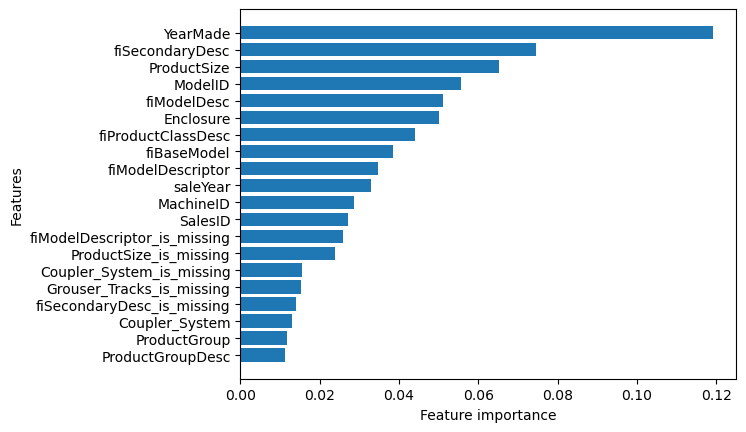

In [105]:
plot_features(X_train.columns, importances)